# Data plot Wasm vs. UniKernel Cold Start and Execution time

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

## Getting data from benchmark

In [14]:
wasm_df = pd.read_csv('./data/times.csv')
fc_mand_df = pd.read_csv('./data/execution_mand.csv') # contains cold start + exec_time
fc_image_df = pd.read_csv('./data/execution_image.csv') # contains cold start + exec_time

# FireCracker cold start
fc_cold_mand_df = pd.read_csv("./data/wt_vs_uk/cold_start_fc_mand.csv")
fc_cold_image_df = pd.read_csv("./data/wt_vs_uk/cold_start_fc_image.csv")

# Get only exec time and remove cold start
fc_mand_df['elapsed_ms'] = fc_mand_df['elapsed_ms'] - fc_cold_mand_df['elapsed_ms']
fc_image_df['elapsed_ms'] = fc_image_df['elapsed_ms'] - fc_cold_image_df['elapsed_ms']
fc_exec_mand_df = fc_mand_df.rename(columns = {'elapsed_ms': 'elapsed_time'})
fc_exec_image_df = fc_image_df.rename(columns = {'elapsed_ms': 'elapsed_time'})

# Formatting the data set
wasm_mand_df = wasm_df[wasm_df['func_name'] == 'mandelbrotset_no_io']
wasm_mand_df = wasm_mand_df[['elapsed_load', 'elapsed_exec']]
wasm_exec_mand_df = wasm_mand_df.rename(columns = {'elapsed_exec': 'elapsed_time'})
wasm_cold_mand_df = wasm_mand_df.rename(columns = {'elapsed_load': 'elapsed_time'})

# Mandelbrot Set with IO istr
wasm_mand_io_df = wasm_df[wasm_df['func_name'] == 'mandelbrotset']
wasm_mand_io_df = wasm_mand_io_df[['elapsed_load', 'elapsed_exec']]
wasm_exec_mand_io_df = wasm_mand_io_df.rename(columns = {'elapsed_exec': 'elapsed_time'})
wasm_cold_mand_io_df = wasm_mand_io_df.rename(columns = {'elapsed_load': 'elapsed_time'})

#img
wasm_image_df = wasm_df[wasm_df['func_name'] == 'image_processing_no_io']
wasm_image_df = wasm_image_df[['elapsed_load', 'elapsed_exec']]
wasm_exec_image_df = wasm_image_df.rename(columns = {'elapsed_exec': 'elapsed_time'})
wasm_cold_image_df = wasm_image_df.rename(columns = {'elapsed_load': 'elapsed_time'})

#io
wasm_image_io_df = wasm_df[wasm_df['func_name'] == 'image_processing']
wasm_image_io_df = wasm_image_io_df[['elapsed_load', 'elapsed_exec']]
wasm_exec_image_io_df = wasm_image_io_df.rename(columns = {'elapsed_exec': 'elapsed_time'})
wasm_cold_image_io_df = wasm_image_io_df.rename(columns = {'elapsed_load': 'elapsed_time'})


# Mean values
fc_cold_mand_mean = fc_cold_mand_df['elapsed_ms'].mean()
fc_cold_image_mean = fc_cold_image_df['elapsed_ms'].mean()
fc_exec_mand_mean = fc_mand_df['elapsed_ms'].mean()
fc_exec_image_mean = fc_image_df['elapsed_ms'].mean()

# Limes 
# No IO
wasm_cold_mand_mean = wasm_cold_mand_df['elapsed_time'].mean()
wasm_exec_mand_mean = wasm_exec_mand_df['elapsed_time'].mean()
wasm_cold_image_mean = wasm_cold_image_df['elapsed_time'].mean()
wasm_exec_image_mean = wasm_exec_image_df['elapsed_time'].mean()

# With IO
wasm_cold_mand_io_mean = wasm_cold_mand_io_df['elapsed_time'].mean()
wasm_exec_mand_io_mean = wasm_exec_mand_io_df['elapsed_time'].mean()
wasm_cold_image_io_mean = wasm_cold_image_io_df['elapsed_time'].mean()
wasm_exec_image_io_mean = wasm_exec_image_io_df['elapsed_time'].mean()


EXEC_TIMES:
WA-M:161.84
WA-M-IO:180.72
FC-M:151.14
WA-I:149.09
WA-I-IO:157.86
FC-I:101.20

COLD_START_TIMES:
WA-M:16.89
WA-M-IO:376.30
FC-M:94.17
WA-I:188.02
WA-I-IO:512.68
FC-I:96.33


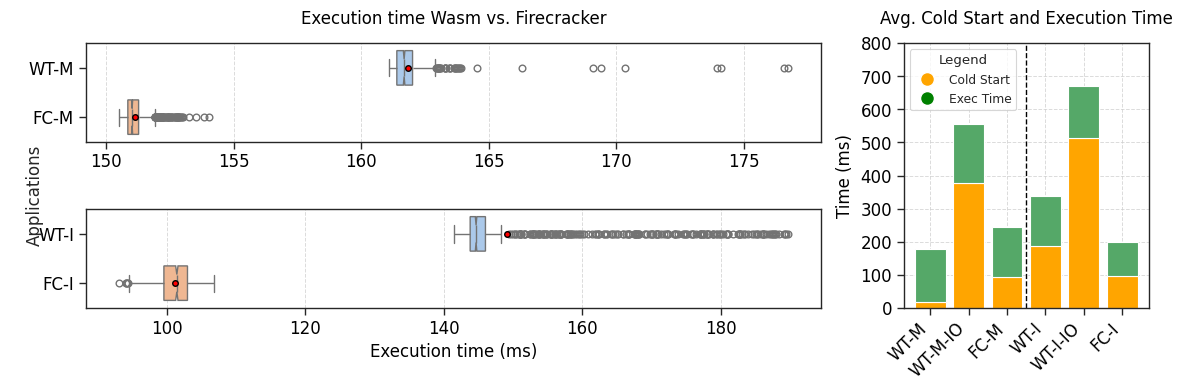

In [18]:
# Groups
wasm_exec_mand_df['Name'] = 'WT-M'
wasm_exec_image_df['Name'] = 'WT-I'
fc_exec_mand_df['Name'] = 'FC-M'
fc_exec_image_df['Name'] = 'FC-I'
df_m = pd.concat([
    wasm_exec_mand_df,
    fc_exec_mand_df,
])

df_i = pd.concat([
    wasm_exec_image_df,
    fc_exec_image_df,
])


# Plot BoxPlot Whisker
fig = plt.figure(figsize = (12, 4))
gs = gridspec.GridSpec(2, 2, width_ratios = [3, 1], height_ratios = [1, 1], figure = fig)

sns.set_theme(style='ticks', context='paper')
plt.subplot(gs[0, 0])
plt.title('Execution time Wasm vs. Firecracker', fontsize=12, pad=14, color='black')
#plt.ylabel('Applications', fontsize = 12, color = 'black', labelpad=14)
plt.ylabel(' ')
plt.xlabel(' ', fontsize = 12, color = 'black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(visible=True, which='major', axis = 'both', linestyle='--', linewidth=0.7, alpha=0.7)

ax = sns.boxplot(
    data = df_m,
    y = 'Name',
    x = 'elapsed_time',
    width = 0.7,
    notch = True,
    showmeans = True,
    meanprops = 
    {
        'marker':'o',
        'markerfacecolor':'red',
        'markeredgecolor':'black',
        'markersize':'4'
    },
    hue = 'Name',
    palette = 'pastel',
)

plt.subplot(gs[1, 0])
ax = sns.boxplot(
    data = df_i,
    y = 'Name',
    x = 'elapsed_time',
    width = 0.7,
    notch = True,
    showmeans = True,
    meanprops = 
    {
        'marker':'o',
        'markerfacecolor':'red',
        'markeredgecolor':'black',
        'markersize':'4'
    },
    hue = 'Name',
    palette = 'pastel',
)

plt.xlabel('Execution time (ms)', fontsize = 12, color = 'black')
plt.ylabel(' ')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(visible=True, which='major', axis = 'x', linestyle='--', linewidth=0.7, alpha=0.7)

fig.supylabel('Applications', y=0.50, x = 0.06, ha='center', fontsize=12)

# Plot Stack Bar
plt.subplot(gs[:, 1])
names = ['WT-M', 'WT-M-IO', 'FC-M', 'WT-I', 'WT-I-IO', 'FC-I']
exec_time = [
    wasm_exec_mand_mean,
    wasm_exec_mand_io_mean,
    fc_exec_mand_mean,
    wasm_exec_image_mean,
    wasm_exec_image_io_mean,
    fc_exec_image_mean
]
print(f'EXEC_TIMES:\nWA-M:{wasm_exec_mand_mean:.2f}\nWA-M-IO:{wasm_exec_mand_io_mean:.2f}\nFC-M:{fc_exec_mand_mean:.2f}\nWA-I:{wasm_exec_image_mean:.2f}\nWA-I-IO:{wasm_exec_image_io_mean:.2f}\nFC-I:{fc_exec_image_mean:.2f}')
cold_start = [
    wasm_cold_mand_mean,
    wasm_cold_mand_io_mean,
    fc_cold_mand_mean,
    wasm_cold_image_mean,
    wasm_cold_image_io_mean,
    fc_cold_image_mean,
]
# For doc
print(f'\nCOLD_START_TIMES:\nWA-M:{wasm_cold_mand_mean:.2f}\nWA-M-IO:{wasm_cold_mand_io_mean:.2f}\nFC-M:{fc_cold_mand_mean:.2f}\nWA-I:{wasm_cold_image_mean:.2f}\nWA-I-IO:{wasm_cold_image_io_mean:.2f}\nFC-I:{fc_cold_image_mean:.2f}')

# plot bars in stack manner
plt.bar(names, cold_start, color='orange')
plt.bar(names, exec_time, bottom=cold_start, color='g')

plt.title('Avg. Cold Start and Execution Time', fontsize=12, pad=14, color='black')
plt.ylabel('Time (ms)', fontsize=12, labelpad=5, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.xticks(rotation=45, ha='right')
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
plt.axvline(x=2.5, color='black', linestyle='--', linewidth=1)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Cold Start',
           markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Exec Time',
           markerfacecolor='green', markersize=10)
]

plt.ylim(0, 800)

# Aggiunta della legenda al grafico
plt.legend(handles=legend_elements, title='Legend', loc='upper left')

plt.savefig('./plots/execution_times.pdf', format = 'pdf', bbox_inches = 'tight')
plt.tight_layout()
plt.show()